# Exploratory Data Analysis (EDA) Image Analysis 

## Emotion Face Classifier Notebook 3

Focuses on showing example expressions and aggregrate representations of emotion categories.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import pandas as pd

from datascifuncs.tidbit_tools import load_json, write_json, print_json, check_directory_name

In [4]:
main_dir = 'EmotionFaceClassifier'
check_directory_name(main_dir)

Directory set to /Users/dsl/Documents/GitHub/EmotionFaceClassifier, matches target dir string EmotionFaceClassifier.


True

In [5]:
# Read in FER 2013 data
fer2013_path = 'data/fer2013_paths.csv'
fer2013 = pd.read_csv(fer2013_path)

In [6]:
fer2013.head()

,emotion_id,pixels,Usage,emotion,image,usage,emo_count_id,img_path,color
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Angry,[[ 70 80 82 ... 52 43 41]\n [ 65 61 58 ...,Training,1,data/Training/Angry/Angry-1.jpg,red
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Angry,[[151 150 147 ... 129 140 120]\n [151 149 149 ...,Training,2,data/Training/Angry/Angry-2.jpg,red
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Fear,[[231 212 156 ... 44 27 16]\n [229 175 148 ...,Training,1,data/Training/Fear/Fear-1.jpg,black
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Sad,[[ 24 32 36 ... 173 172 173]\n [ 25 34 29 ...,Training,1,data/Training/Sad/Sad-1.jpg,blue
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Neutral,[[ 4 0 0 ... 27 24 25]\n [ 1 0 0 ... 26 23...,Training,1,data/Training/Neutral/Neutral-1.jpg,slategray


In [7]:
from utils.image_processing import display_random_images_from_df

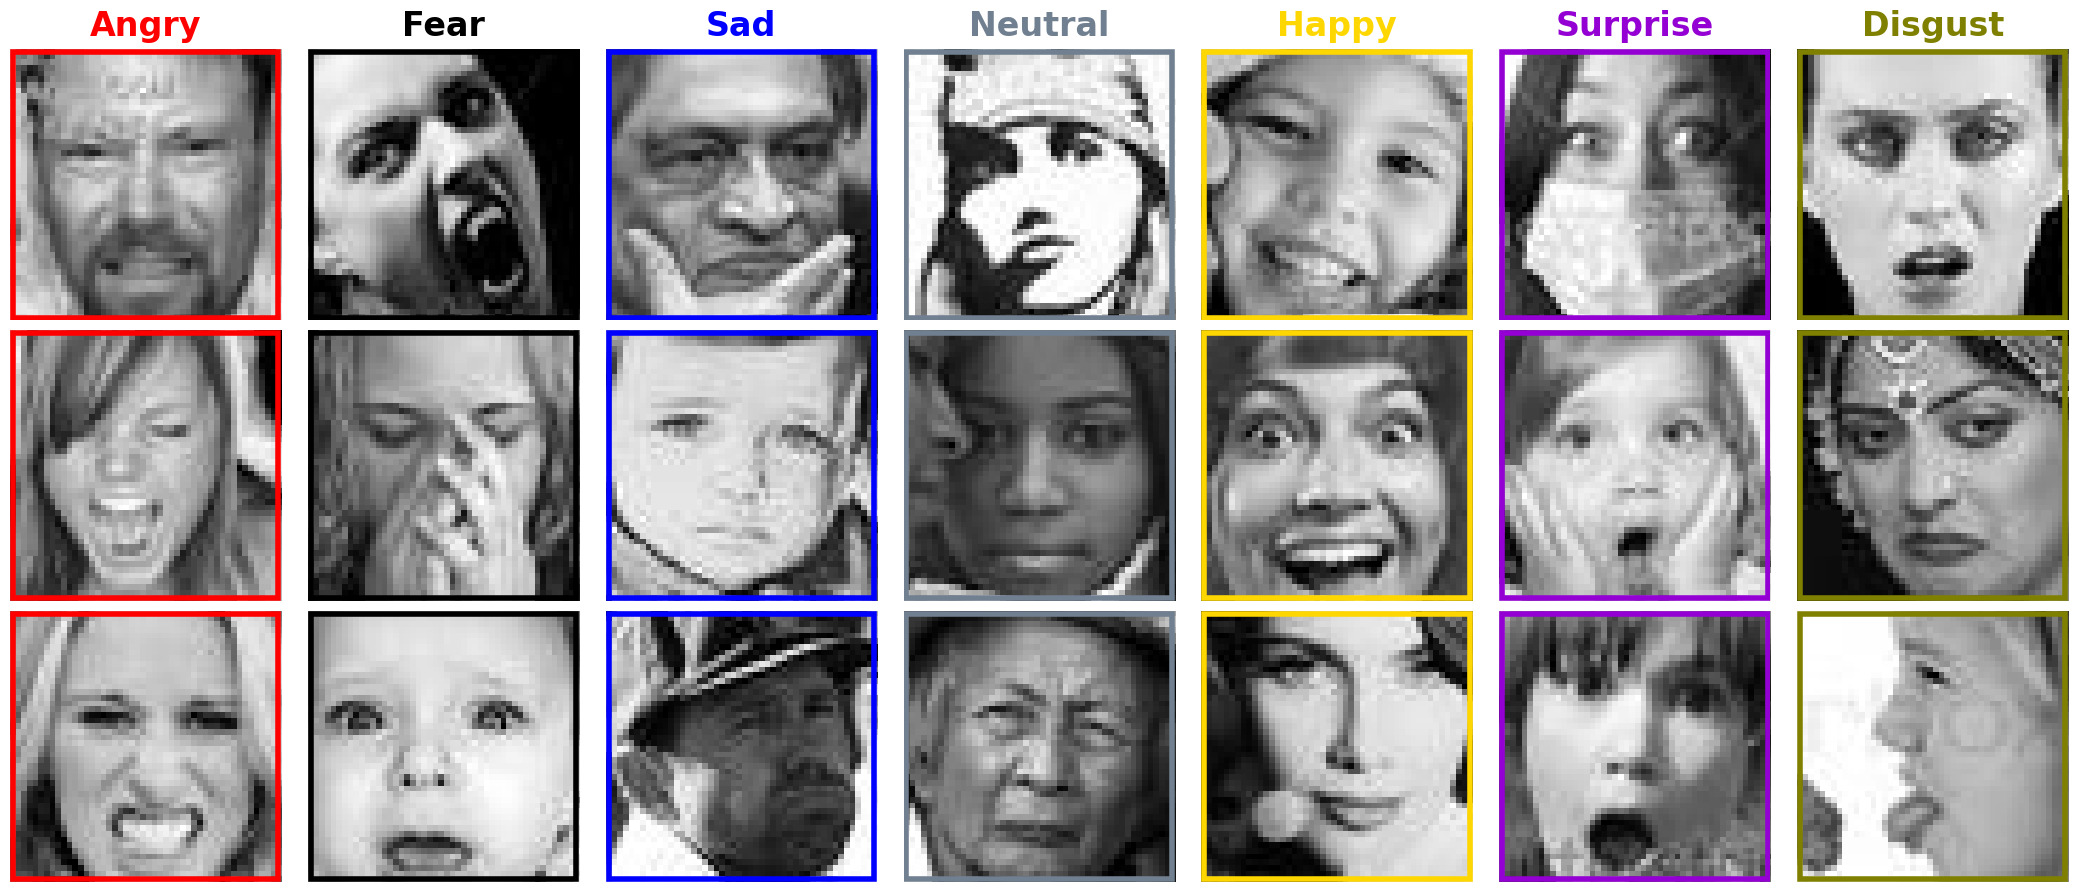

In [8]:
display_random_images_from_df(fer2013, n_rows=3)

In [9]:
# Import your custom functions from the utils file
from utils.image_processing import process_mean_images, process_median_images

In [10]:
import mlflow
import os

In [11]:
def log_and_save_image(image, category, variation, output_dir):
    """
    Log an image and save it locally and to MLflow.
    
    Parameters:
    - image: The image to log and save.
    - category: The category (emotion) name.
    - variation: The variation of the average image process.
    - output_dir: Directory to save the image locally.
    """
    # Save the image locally
    file_path = os.path.join(output_dir, f"{category}_{variation}.png")
    save_image(image, file_path)
    
    # Log the image in MLflow
    mlflow.log_artifact(file_path)
    
    return file_path

In [12]:
def process_mean_images(df, output_dir="outputs"):
    """
    Process the mean images for each category and log results with MLflow.
    
    Parameters:
    - df: pandas DataFrame with 'Category', 'File Path', and 'Color' columns.
    - output_dir: Directory to save the images locally.
    """
    # Start an MLflow run
    with mlflow.start_run(run_name="Mean Image Processing"):
        # Load images by category
        category_images = load_images_from_df(df)
        
        # Process mean images
        for category, images in category_images.items():
            mean_image = compute_mean_image(images)
            mlflow.log_param(f"{category}_method", "mean")
            
            # Save and log the image
            file_path = log_and_save_image(mean_image, category, "mean", output_dir)
            print(f"Saved and logged mean image for {category}: {file_path}")

In [13]:
def process_median_images(df, output_dir="outputs"):
    """
    Process the median images for each category and log results with MLflow.
    
    Parameters:
    - df: pandas DataFrame with 'Category', 'File Path', and 'Color' columns.
    - output_dir: Directory to save the images locally.
    """
    with mlflow.start_run(run_name="Median Image Processing"):
        # Load images by category
        category_images = load_images_from_df(df)
        
        # Process median images
        for category, images in category_images.items():
            median_image = compute_median_image(images)
            mlflow.log_param(f"{category}_method", "median")
            
            # Save and log the image
            file_path = log_and_save_image(median_image, category, "median", output_dir)
            print(f"Saved and logged median image for {category}: {file_path}")

In [14]:
# Run the mean image processing pipeline and log the results with MLflow
process_mean_images(fer2013, output_dir="outputs")


NameError: name 'load_images_from_df' is not defined

In [ ]:
# Run the median image processing pipeline and log the results with MLflow
process_median_images(fer2013, output_dir="outputs")


In [ ]:
# Run the median image processing pipeline and log the results with MLflow
process_median_images(fer2013, output_dir="outputs")


In [ ]:
!mlflow ui